In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

import ipywidgets as widgets
from IPython.display import display, clear_output


In [2]:
#funkcja import pliku
def f_file_import(name:str):
    return pd.read_csv(name)


In [3]:
#Zaimportowanie pliku z pc
df_clean = f_file_import('df_clean.csv')

In [4]:
#funkcja wykres słupkowy - liczebność - dwie zmienne - col x
def count_plot_col(df, var_col:str, var_x:str,column_wrap:int =3, height_value:float = 4):
    g = sns.catplot(data = df, col = var_col , x = var_x,  kind = 'count', height = height_value, col_wrap=column_wrap)
    g.set_titles('{col_name}');


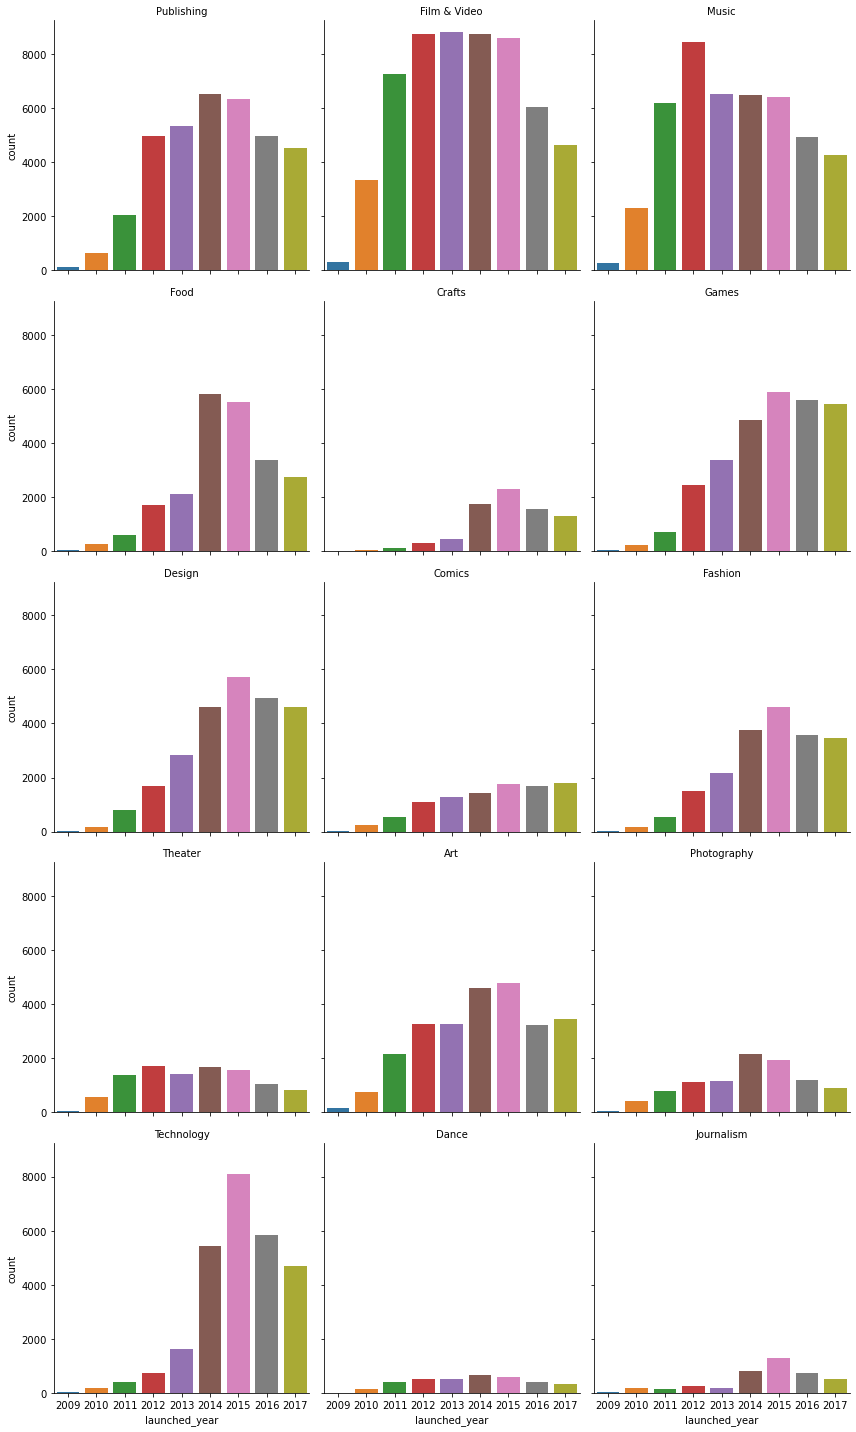

In [57]:
#Tak wyglądają wykresy teraz
year_main_category_count = count_plot_col(df_clean, 'main_category', 'launched_year')
year_main_category_count

In [6]:
#lista kategorii do wyboru
list_main_category = list(df_clean['main_category'].unique())
list_main_category

['Publishing',
 'Film & Video',
 'Music',
 'Food',
 'Crafts',
 'Games',
 'Design',
 'Comics',
 'Fashion',
 'Theater',
 'Art',
 'Photography',
 'Technology',
 'Dance',
 'Journalism']

In [7]:
#Definicja widgetu
wdg_year_main_category_count = widgets.SelectMultiple(
    options=list_main_category,
    value=[list_main_category[0]],
    #rows=10,
    description='Kategoria',
    disabled=False)

In [ ]:
#Wybieram interesujące mnie kategorie
wdg_year_main_category_count

In [61]:
#Tworzę z nich listę
list_wdg_year_main_category = list(wdg_year_main_category_count.value)
list_wdg_year_main_category

['Publishing']

In [62]:
# tworzę DF z wyfiltrowanymi kategoriami
df_new = df_clean[df_clean['main_category'].isin(list_wdg_year_main_category)]
df_new.head(3)

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,launched_month,launched_year,launched_date,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95,8,2015,2015-08-11,59
7,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09,2013-09-09 18:19:37,failed,0,CA,0.0,2406.39,9,2013,2013-09-09,30
14,1000068480,Notes From London: Above & Below,Art Books,Publishing,USD,2015-05-10,2015-04-10 21:20:54,failed,20,US,789.0,3000.00,4,2015,2015-04-10,30


In [63]:
#Sprawdzenie, czy w danych rzeczywiście mamy tylko dane z listy
df_new['main_category'].unique()

array(['Publishing'], dtype=object)

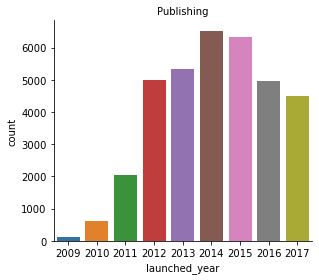

In [64]:
#rysuję wykresy z nowym DF bazującym na wyborze wartości z widgetu
plt_wdg_year_main_category_count = count_plot_col(df_new, 'main_category', 'launched_year',
                                                  column_wrap=3, height_value = 4)


***

### Odświeżalny wybór kategorii:

In [5]:
#lista kategorii do wyboru
list_main_category = list(df_clean['main_category'].unique())

#Definicja widgetu
wdg_year_main_category_count__main_cat = widgets.SelectMultiple(
    options=list_main_category,
    value=[list_main_category[0]],
    rows=10,
    description='Kategoria',
    disabled=False)



In [14]:
#lista lat do wyboru
list_launched_year = sorted(list(df_clean['launched_year'].unique()))

#Definicja widgetu
wdg_year_main_category_count__launched_year = widgets.SelectMultiple(
    options=list_launched_year,
    value=[list_launched_year[0]],
    rows=10,
    description='Rok',
    disabled=False)

In [15]:
#definicja wyświetlania widgetów w poziomie
layout = widgets.Layout(display='flex',
         flex_flow='row',
         border='solid green',
         width='50%')


In [42]:
widgets.Box(children=[wdg_year_main_category_count__main_cat, wdg_year_main_category_count__launched_year], layout=layout)

Box(children=(SelectMultiple(description='Kategoria', index=(3, 6, 8, 9, 13), options=('Publishing', 'Film & V…

Button(description='Odśwież', style=ButtonStyle())

Output()

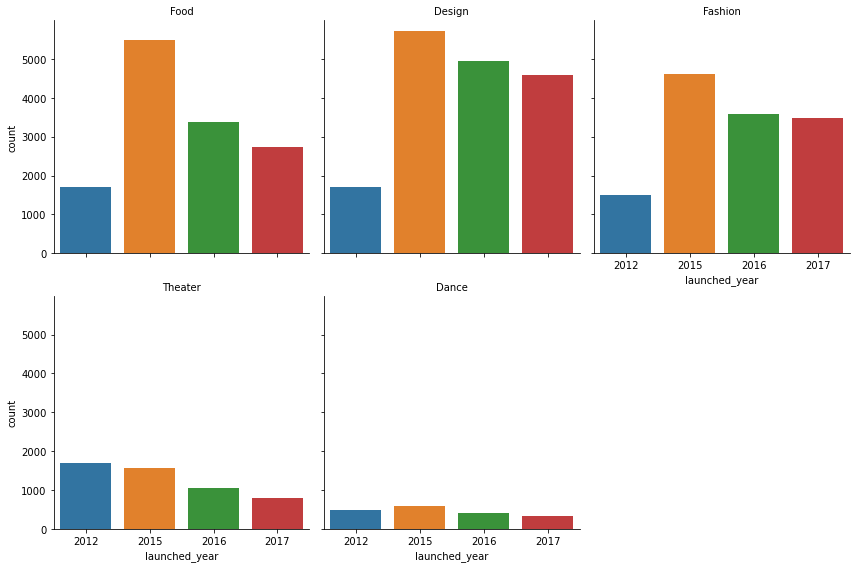

In [43]:

refresh_button = widgets.Button(description="Odśwież")
output = widgets.Output()


def refresh(b):
    clear_output()
    display(refresh_button, output)
    #tworzę listę wybranych kategorii
    list_wdg_main_category = list(wdg_year_main_category_count__main_cat.value)
    #tworzę listę wybranych lat
    list_wdg_launched_year = list(wdg_year_main_category_count__launched_year.value)
    #Filtruję DF wg wybranych kategorii
    df_new = df_clean[( df_clean['main_category'].isin(list_wdg_main_category) ) & ( df_clean['launched_year'].isin(list_wdg_launched_year) )]
    #Tworzę wykres na podstawie nowego DF
    return count_plot_col(df_new, 'main_category', 'launched_year')

display(refresh_button, output)
refresh_button.on_click(refresh)